In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats
import scipy.stats as st

In [2]:
data = pd.read_csv("hackathon2.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [3]:
# To find if there are null values 
data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [4]:
# Sort the categorical columns 
cat_columns = data.select_dtypes(include= ['object']).columns.tolist()
cat_columns

['NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'APPLICATION_DAY']

In [5]:
# sort numerical columns 
num_columns = data.select_dtypes(exclude = ['object']).columns.tolist()
num_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'TOTAL_DOC_SUBMITTED']

# Gender Analysis of Non defaulters 

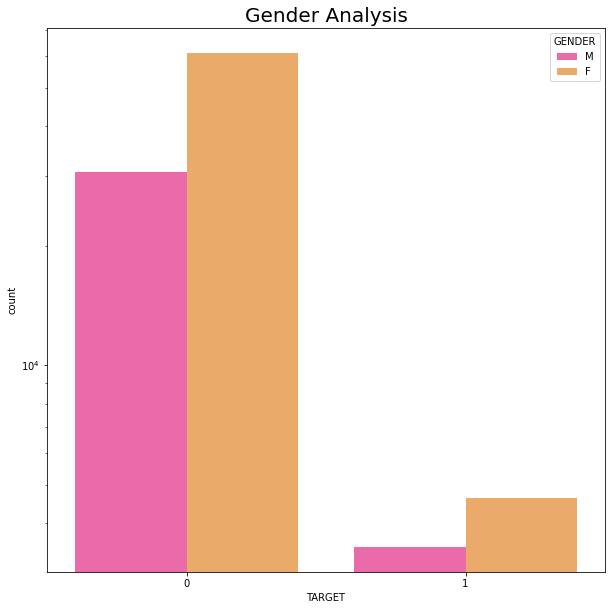

In [6]:
g = data['GENDER'].mode()[0]
data['GENDER'] = data['GENDER'].replace(to_replace =['XNA'], value=[g])
plt.figure(figsize=(10,10))
plt.title('Gender Analysis', size=20)
sb.countplot(x=data['TARGET'], hue=data['GENDER'], palette='spring')
plt.yscale('log')
plt.show()

In [7]:
data1 = data[data['TARGET']==0]
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1


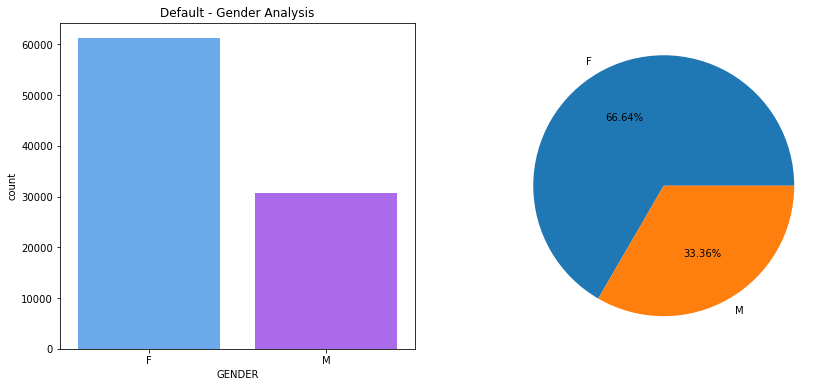

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Default - Gender Analysis')
sb.countplot(data=data1,x='GENDER', palette='cool')


plt.subplot(122)
perc1 = data1['GENDER'].value_counts()   
n1 =  list( data1['GENDER'].value_counts().index)       
plt.pie(perc1, labels = n1, autopct='%.2f%%')

plt.show()

## Conclusion:

## Females are more likely to default in the repayment of the loan 

# Asset Analysis 

In [9]:
asset = data[(data['Car']=='Y') & (data['House']=='Y')]
asset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,427500.0,...,-4286,1,1,0,1,0,Laborers,2.0,FRIDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,216067,0,Cash loans,M,Y,Y,0,180000.0,1002870.0,922500.0,...,365243,1,0,0,1,0,NaN,2.0,MONDAY,1
99984,216075,0,Cash loans,F,Y,Y,0,225000.0,513531.0,459000.0,...,-5127,1,1,0,1,0,Sales staff,1.0,FRIDAY,1
99985,216076,0,Cash loans,M,Y,Y,0,157500.0,445500.0,445500.0,...,-803,1,1,0,1,0,Drivers,2.0,SATURDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1


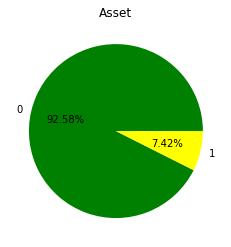

In [10]:
plt.title('Asset')
perc1 = asset['TARGET'].value_counts()   
n1 =  list( asset['TARGET'].value_counts().index)       
plt.pie(perc1, labels = n1, autopct='%.2f%%', colors=('g','yellow')) 
plt.show()

In [11]:
asset1 = data[((data['Car']=='Y') & (data['House']=='N')) | ((data['Car']=='N') & (data['House']=='Y'))]
asset1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,216082,0,Cash loans,M,Y,N,2,270000.0,450000.0,450000.0,...,-5525,1,1,0,1,0,Managers,4.0,MONDAY,1
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,-135,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1


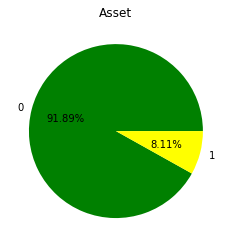

In [12]:
plt.title('Asset')
perc1 = asset1['TARGET'].value_counts()   
n1 =  list( asset1['TARGET'].value_counts().index)       
plt.pie(perc1, labels = n1, autopct='%.2f%%', colors=('g','yellow')) 
plt.show()

## Conclusion
## Customers with either both assets or one of two assests are less likely to default  

## Target and Name Contract Type analysis 

In [13]:
data['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

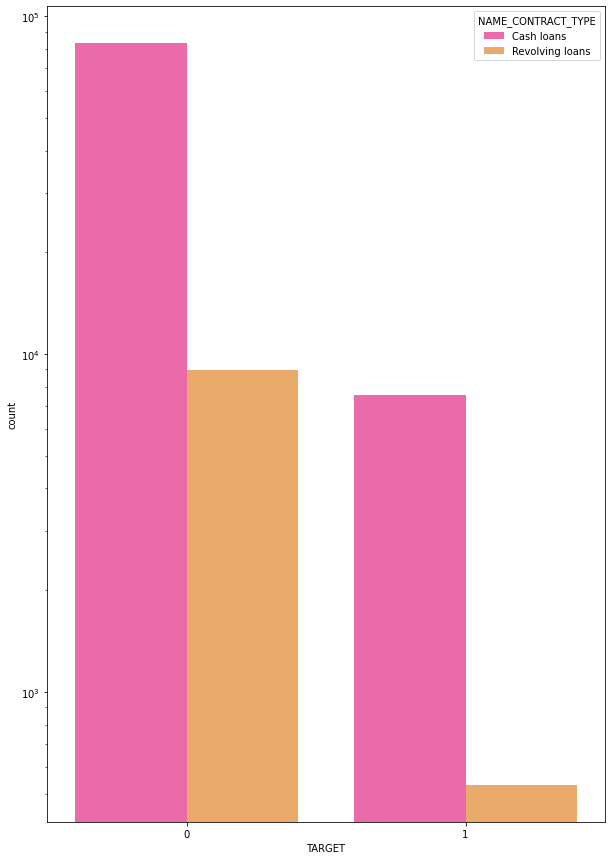

In [14]:
plt.figure(figsize=(10,15))
sb.countplot(x=data['TARGET'], hue=data['NAME_CONTRACT_TYPE'], palette='spring')
plt.yscale('log')
plt.show()

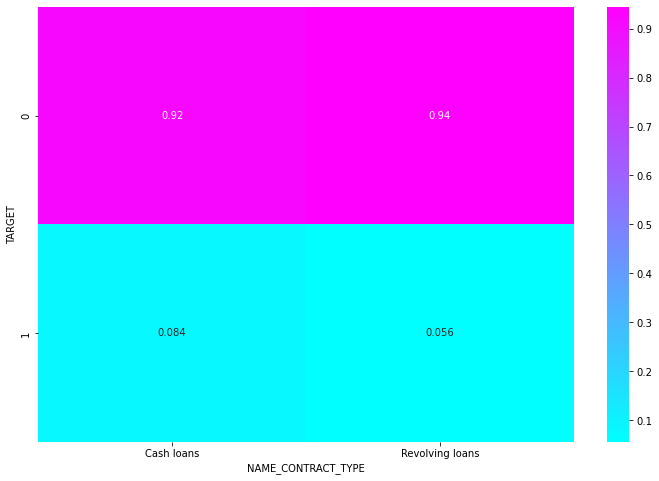

In [37]:
dt = pd.crosstab(index=data['TARGET'], columns= data['NAME_CONTRACT_TYPE'],normalize = 'columns')
dt
plt.figure(figsize=(12,8))
sb.heatmap(dt, annot=True, cbar=True, cmap='cool' )
plt.show()

## Customers who availed revolving loan are more likely to repay the loan without any default 

## NAME_EDUCATION_TYPE and Target Analysis 

In [16]:
data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

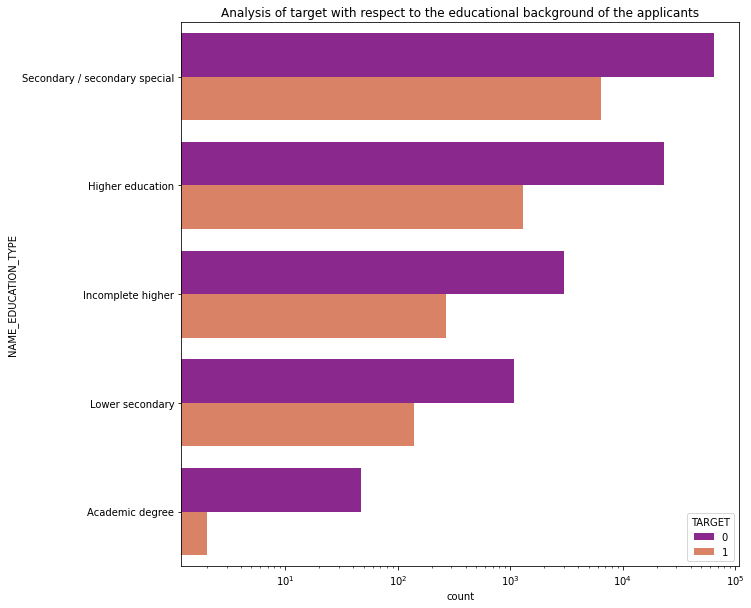

In [17]:
plt.figure(figsize=(10,10))
plt.title('Analysis of target with respect to the educational background of the applicants')
sb.countplot(y=data['NAME_EDUCATION_TYPE'], hue=data['TARGET'], palette='plasma')
plt.xscale('log')
plt.show()

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='TARGET'>

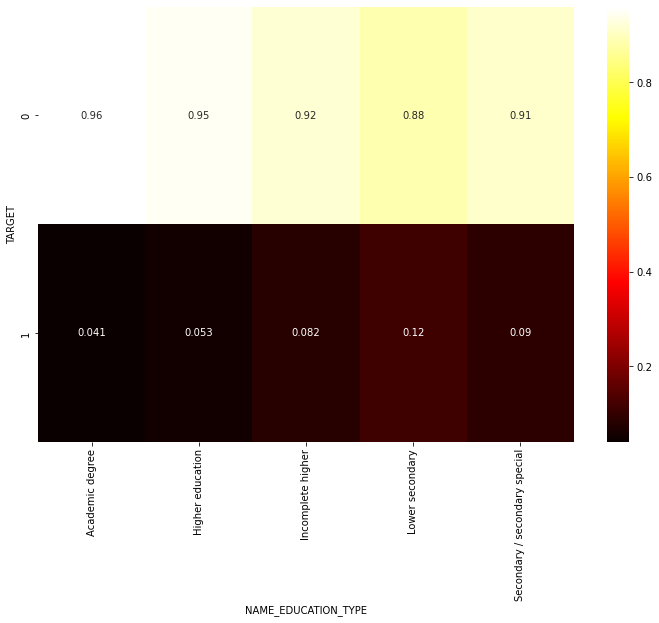

In [18]:
dt = pd.crosstab(index=data['TARGET'], columns= data['NAME_EDUCATION_TYPE'],normalize = 'columns')
dt
plt.figure(figsize=(12,8))
sb.heatmap(dt, annot=True, cbar=True, cmap='hot' )

## Person with the academic degree should be preferred


## Target and No of dependents (family)

In [19]:
data['CNT_FAM_MEMBERS'].describe()

count    99999.000000
mean         2.155672
std          0.908897
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [20]:
# data processing 

dep = data['CNT_FAM_MEMBERS'].mode()[0]             # calculating mode 
idx = data[data['CNT_FAM_MEMBERS']>6].index      # indexes of the values more than 6
data.loc[idx,['CNT_FAM_MEMBERS']] = dep          # replacing the values 

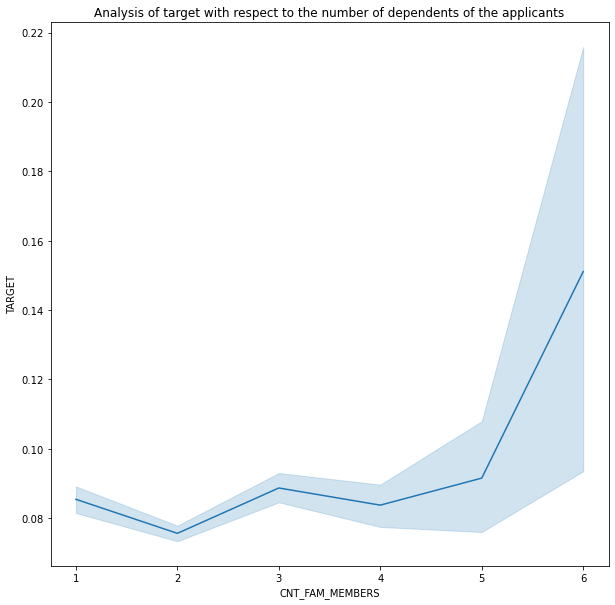

In [21]:
plt.figure(figsize=(10,10))
plt.title('Analysis of target with respect to the number of dependents of the applicants')
sb.lineplot(x=data['CNT_FAM_MEMBERS'], y = data['TARGET'])
plt.show()

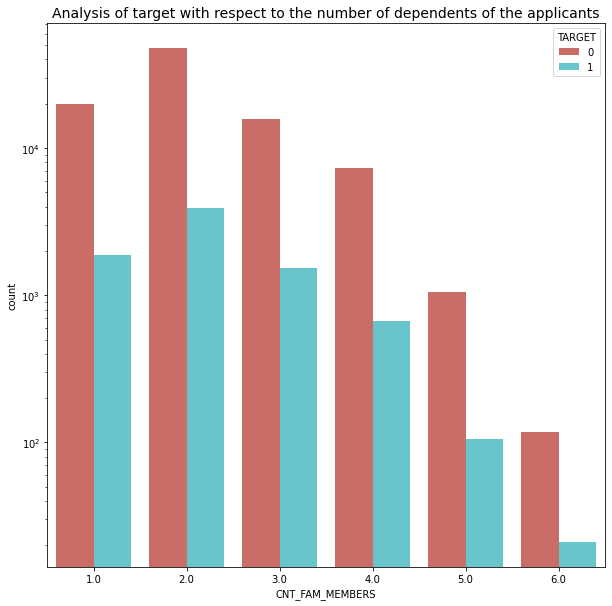

In [22]:
plt.figure(figsize=(10,10))
plt.title('Analysis of target with respect to the number of dependents of the applicants', size=14)
sb.countplot(x =data['CNT_FAM_MEMBERS'], hue = data['TARGET'], palette='hls')
plt.yscale('log')
plt.show()

## Customers with 2 family members are more likely to default 

## Income type analysis with traget

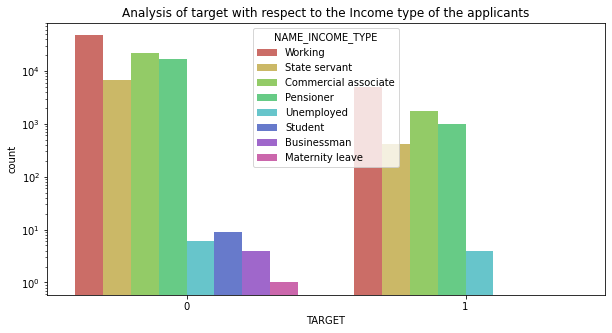

In [23]:
plt.figure(figsize=(10,5))
plt.title('Analysis of target with respect to the Income type of the applicants')
sb.countplot(hue=data['NAME_INCOME_TYPE'], x = data['TARGET'], palette='hls')
plt.yscale('log')
plt.show()

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='TARGET'>

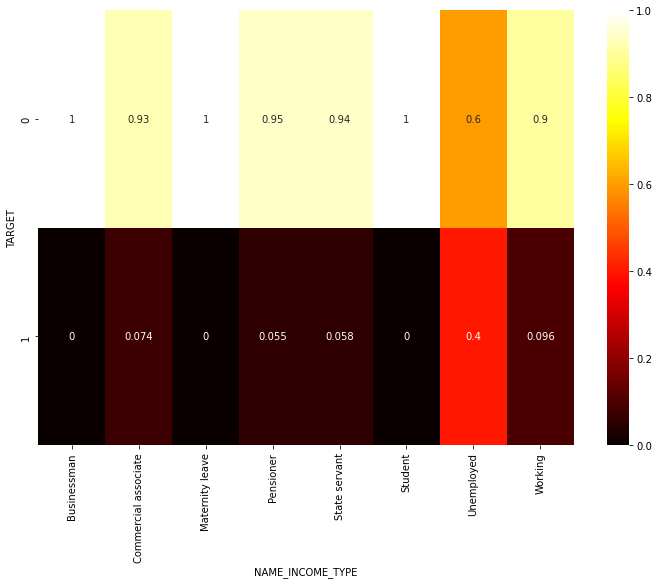

In [24]:
dt = pd.crosstab(index=data['TARGET'], columns= data['NAME_INCOME_TYPE'],normalize = 'columns')
dt
plt.figure(figsize=(12,8))
sb.heatmap(dt, annot=True, cbar=True, cmap='hot' )

## Name type suit analysis wrt target

In [26]:

suit = data['NAME_TYPE_SUITE'].mode()[0]             # calculating mode 
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna(suit)

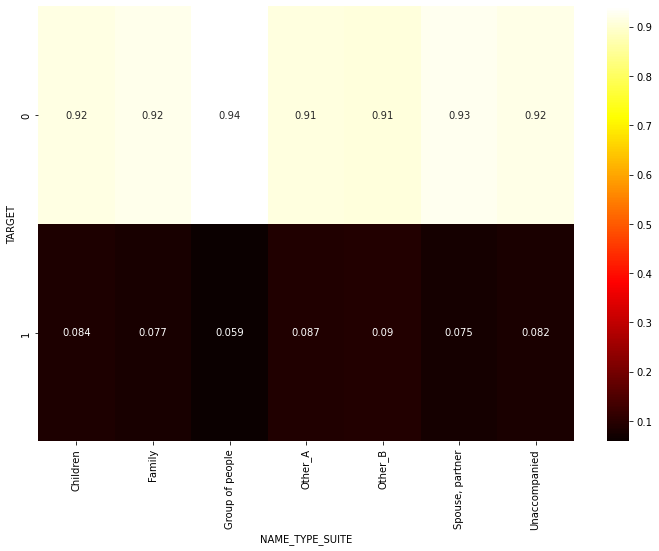

In [27]:
dt2 = pd.crosstab(index=data['TARGET'], columns= data['NAME_TYPE_SUITE'],normalize = 'columns')

plt.figure(figsize=(12,8))
sb.heatmap(dt2, annot=True, cbar=True, cmap='hot')
plt.show()

In [28]:
df1 = pd.DataFrame()
df1['Cust_ID'] = data['SK_ID_CURR']
df1['Default'] = data['TARGET']
df1['Income'] = data['AMT_INCOME_TOTAL']
df1['Credit'] = data['AMT_CREDIT']
df1['Income_credit_ratio'] = round((data['AMT_INCOME_TOTAL']/data['AMT_CREDIT']),2)
df1

,Cust_ID,Default,Income,Credit,Income_credit_ratio
0,100002,1,202500.0,406597.5,0.50
1,100003,0,270000.0,1293502.5,0.21
2,100004,0,67500.0,135000.0,0.50
3,100006,0,135000.0,312682.5,0.43
4,100007,0,121500.0,513000.0,0.24
...,...,...,...,...,...
99995,216086,0,157500.0,755190.0,0.21
99996,216087,0,225000.0,284400.0,0.79
99997,216088,0,135000.0,1262583.0,0.11
99998,216089,0,135000.0,225000.0,0.60


In [29]:
df2 = df1[(df1['Default']==1)]
df2['Income_credit_ratio'].describe()

count    8093.000000
mean        0.409605
std         2.328217
min         0.010000
25%         0.200000
50%         0.310000
75%         0.470000
max       208.000000
Name: Income_credit_ratio, dtype: float64

In [30]:
df3 = df1[df1['Default']==0]
df3['Income_credit_ratio'].describe()

count    91907.000000
mean         0.400234
std          0.341115
min          0.020000
25%          0.190000
50%          0.300000
75%          0.500000
max         12.000000
Name: Income_credit_ratio, dtype: float64

## Family status and target analysis 

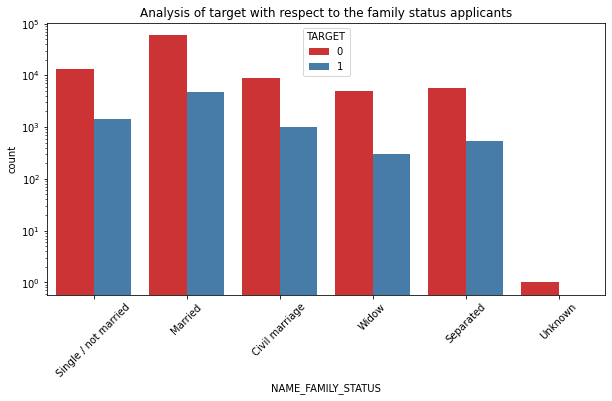

In [31]:
plt.figure(figsize=(10,5))
plt.title('Analysis of target with respect to the family status applicants')
sb.countplot(x=data['NAME_FAMILY_STATUS'], hue = data['TARGET'], palette='Set1')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

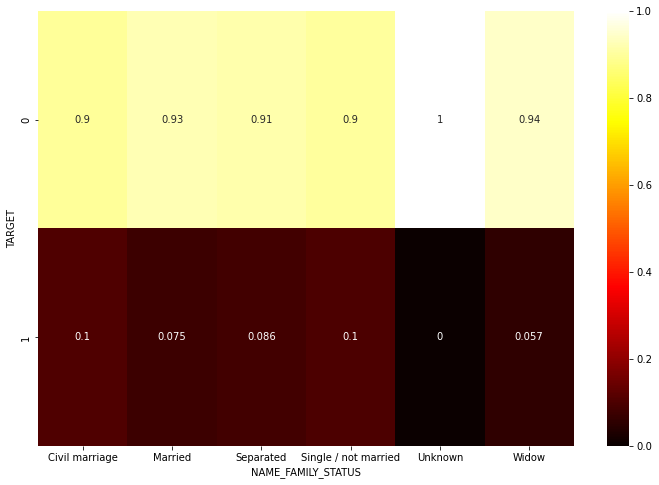

In [32]:
dt2 = pd.crosstab(index=data['TARGET'], columns= data['NAME_FAMILY_STATUS'],normalize = 'columns')

plt.figure(figsize=(12,8))
sb.heatmap(dt2, annot=True, cbar=True, cmap='hot')
plt.show()

In [33]:
data2 = data[data['TARGET']==1]
data2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,-2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,-1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,-3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,NaN,2.0,THURSDAY,1


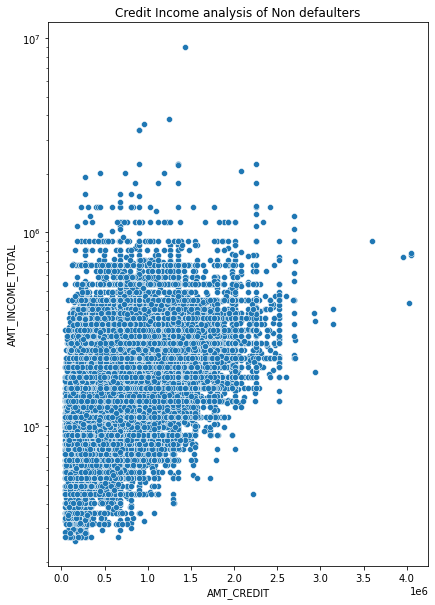

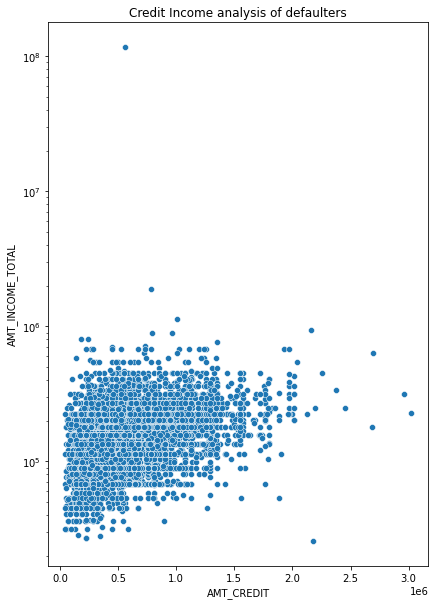

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('Credit Income analysis of Non defaulters')
sb.scatterplot(x=data1['AMT_CREDIT'], y=data1['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(122)
plt.title('Credit Income analysis of defaulters')
sb.scatterplot(x=data2['AMT_CREDIT'], y=data2['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.show()

# Conclusions:

## There are less defaults if the loan type is  Revolving loan
## Person with the academic degree should be preferred
## Applicants with income type- Business and student are less likely to default
## Applicants having either of the assets or both the assets must be preferred 
## Applicants who are married have lesser probability to default 
## Males should be preferred over 





